
# Project: Investigate TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue.

1. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

2. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

Some of the questions that we will try to answer using this data set are : 
1. Which genres are most popular from year to year? and are they associated with a directors or production companies ?
2. What kinds of properties are associated with movies that have high revenues ?



In [1]:
#importing the needed libraries for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#reading the data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df[df.revenue == 0].shape

(6016, 21)

In [7]:
df[df.budget == 0].shape

(5696, 21)

#### General remarks about the data
1. The data set contains 10866 rows.
2. The data types doesn't need any wrangling.
3. Some columns have missing values ( cast, homepage, director, tagline, keywords, overview, genres, production companies)
4. There is 6016 entries with 0 in the revenue column, and 5696 entries with 0 in the budget column.


## Data Cleaning 

### Checking duplicates
There is duplicated row only, the decision is to drop this row.

In [8]:
#cheking duplicates
sum(df.duplicated())
df [ df.duplicated() == True ]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#Droping the duplicated row
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

### Droping unnecessary columns for our analysis
Inorder to answer the questions mentioned above, we will need some columns from this data set. In the coming section, we will drop the unnecessary columns from this data set.

In [10]:
#Droping the columns that we don't need in our analysis
columns = ['imdb_id','homepage','tagline','budget','revenue','homepage','overview','release_date','cast','keywords']
df.drop(columns, axis = 1, inplace = True)

In [11]:
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


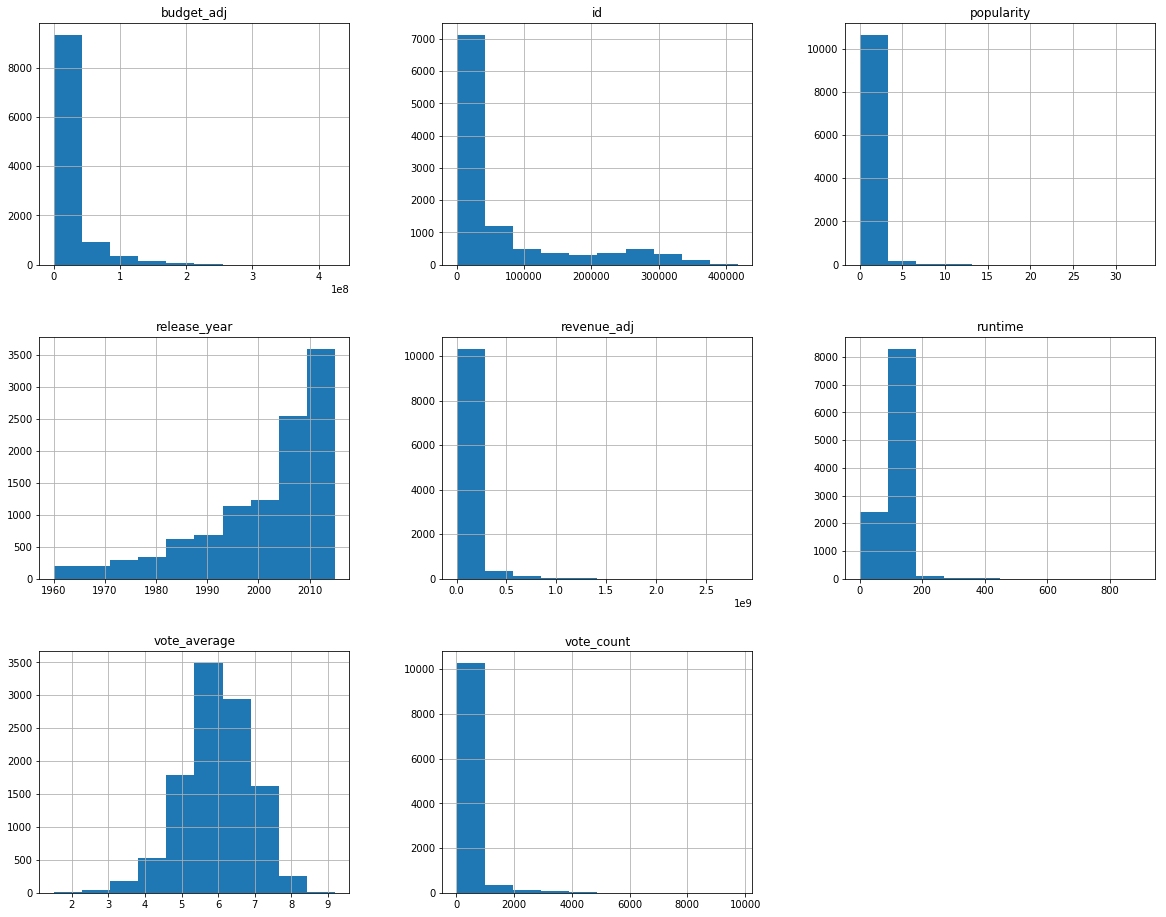

In [12]:
df.hist(figsize = (20,16));

### Correcting missing values
Some columns have missing values (director, genres, production companies), in this section we will fix the missing values using the appropriate method.

In [13]:
df[df.director.isnull()].shape

(44, 12)

In [14]:
df[df.genres.isnull()].shape

(23, 12)

In [15]:
df[df.production_companies.isnull()].shape

(1030, 12)

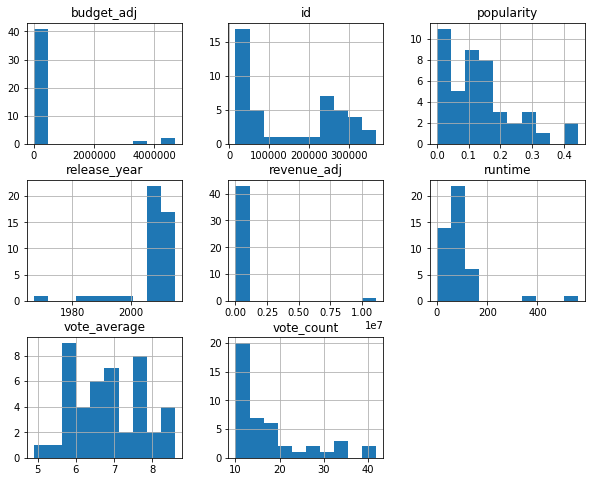

In [16]:
df[df.director.isnull()].hist(figsize = (10,8));

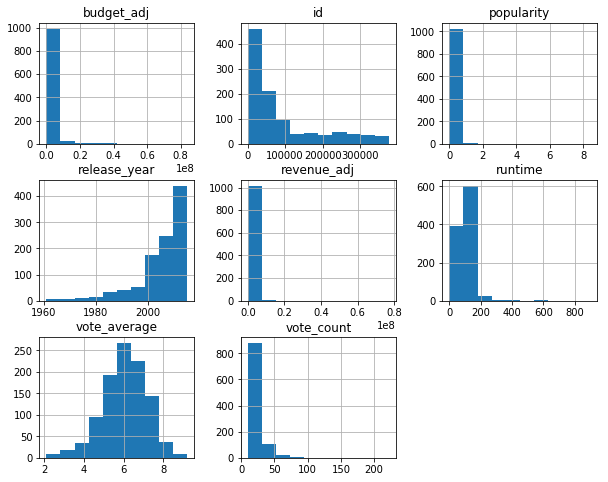

In [17]:
df[df.production_companies.isnull()].hist(figsize = (10,8));

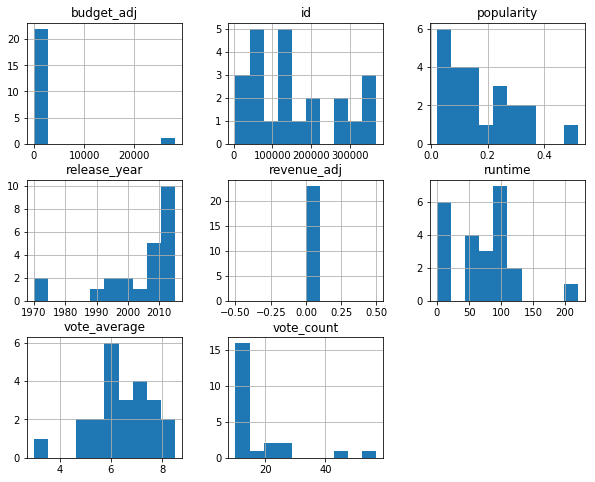

In [18]:
df[df.genres.isnull()].hist(figsize = (10,8));

1. We notice that the rows with missing columns are not that different from the rest of the data.
2. For the rows missing director or genres, we will drop them, especially that most of them don't have information about the budget and the revenue.
3. For the rows missing production company, we will fill in the missing values with _Unknown production company_.

In [12]:
#Droping the rows with Null genres and director values
df.dropna(subset=['genres', 'director'], inplace = True)
df.shape

(10800, 12)

In [14]:
#Filling the null values for production company as Unknown production Company
df.production_companies.fillna('Unknown production company',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 12 columns):
id                      10800 non-null int64
popularity              10800 non-null float64
original_title          10800 non-null object
director                10800 non-null object
runtime                 10800 non-null int64
genres                  10800 non-null object
production_companies    10800 non-null object
vote_count              10800 non-null int64
vote_average            10800 non-null float64
release_year            10800 non-null int64
budget_adj              10800 non-null float64
revenue_adj             10800 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ MB


### Creating the income columns 
this columns will contain the difference between the budget and the revenue, it respresent the income if it's positive and and the loss if it's negative.

In [15]:
#Creating income_adj column
df['income_adj'] = df['revenue_adj'] - df['budget_adj'] 
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,income_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 13 columns):
id                      10800 non-null int64
popularity              10800 non-null float64
original_title          10800 non-null object
director                10800 non-null object
runtime                 10800 non-null int64
genres                  10800 non-null object
production_companies    10800 non-null object
vote_count              10800 non-null int64
vote_average            10800 non-null float64
release_year            10800 non-null int64
budget_adj              10800 non-null float64
revenue_adj             10800 non-null float64
income_adj              10800 non-null float64
dtypes: float64(5), int64(4), object(4)
memory usage: 1.2+ MB


### Advanced cleaning for the genres and production company columns
In this section, we will clean the data inorder to have one genre and one production company per row.

In [17]:
#checking the number of rows with more then a genres.
df[ df.genres.str.contains('|')].shape

(10800, 13)

In [58]:
#Creating a data frame where each row contain one genre 
df_genre = pd.DataFrame(columns  = df.columns)
i = 0
for index,row in df.iterrows():
    for genre in row.genres.split('|'):
        row.genres = genre
        df_genre.loc[i] = row 
        i = i + 1    

In [59]:
df_genre.shape

(26869, 13)

In [60]:
#checking the values of genres.
df_genre.genres.value_counts()

Drama              4755
Comedy             3782
Thriller           2905
Action             2379
Romance            1708
Horror             1636
Adventure          1466
Crime              1354
Science Fiction    1224
Family             1223
Fantasy             912
Mystery             809
Animation           692
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: genres, dtype: int64

In [61]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26869 entries, 0 to 26868
Data columns (total 13 columns):
id                      26869 non-null object
popularity              26869 non-null float64
original_title          26869 non-null object
director                26869 non-null object
runtime                 26869 non-null object
genres                  26869 non-null object
production_companies    26869 non-null object
vote_count              26869 non-null object
vote_average            26869 non-null float64
release_year            26869 non-null object
budget_adj              26869 non-null float64
revenue_adj             26869 non-null float64
income_adj              26869 non-null float64
dtypes: float64(5), object(8)
memory usage: 2.9+ MB


In [63]:
#Creating a data frame where each row contain one production company 
df_prod = pd.DataFrame(columns  = df.columns)
i = 0
for index,row in df.iterrows():
    for prod in row.production_companies.split('|'):
        row.production_companies = prod
        df_prod.loc[i] = row 
        i = i + 1

In [69]:
#checking the production companies.
df_prod.production_companies.value_counts()

Unknown production company                              994
Universal Pictures                                      522
Warner Bros.                                            509
Paramount Pictures                                      431
Twentieth Century Fox Film Corporation                  282
Columbia Pictures                                       272
New Line Cinema                                         219
Metro-Goldwyn-Mayer (MGM)                               218
Walt Disney Pictures                                    213
Touchstone Pictures                                     178
Columbia Pictures Corporation                           160
TriStar Pictures                                        147
Miramax Films                                           139
Relativity Media                                        108
Regency Enterprises                                      95
Canal+                                                   92
20th Century Fox                        

In [70]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24188 entries, 0 to 24187
Data columns (total 13 columns):
id                      24188 non-null object
popularity              24188 non-null float64
original_title          24188 non-null object
director                24188 non-null object
runtime                 24188 non-null object
genres                  24188 non-null object
production_companies    24188 non-null object
vote_count              24188 non-null object
vote_average            24188 non-null float64
release_year            24188 non-null object
budget_adj              24188 non-null float64
revenue_adj             24188 non-null float64
income_adj              24188 non-null float64
dtypes: float64(5), object(8)
memory usage: 2.6+ MB


In [23]:
#Saving the two data frames in a csv files ( because executing the code for creating them take around 5 minutes)
df_genre.to_csv('tmdb-movies-genres.csv')
df_prod.to_csv('tmdb-movies-prod.csv')

In [2]:
#Reading them directly in case we restart the kernel.
df_genre = pd.read_csv('tmdb-movies-genres.csv')
df_prod = pd.read_csv('tmdb-movies-prod.csv')

<a id='eda'></a>
## Exploratory Data Analysis


### Q1 Which genres are most popular from year to year? and are they associated with a directors or production companies ?

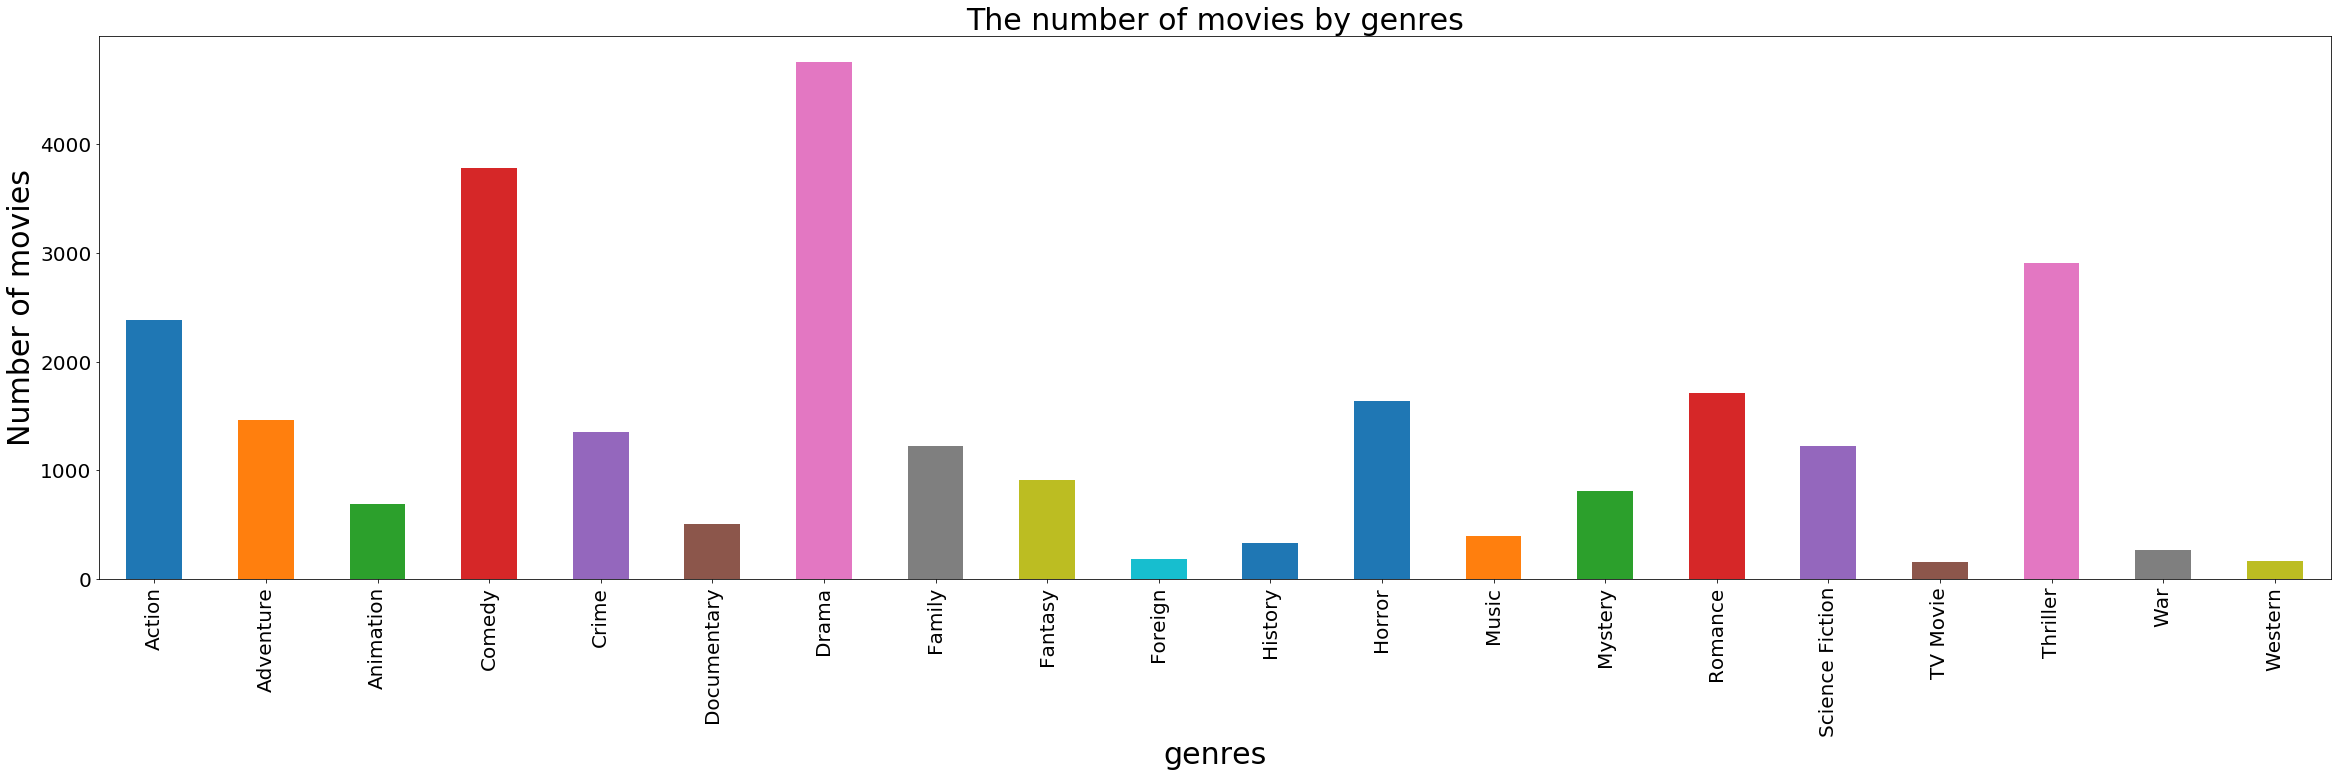

In [6]:
#Plotting the number of movies by genres.
plt.figure(figsize=(40,10))
plt.xlabel('release year', fontsize=30)
plt.ylabel('Number of movies', fontsize=30)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('The number of movies by genres', fontsize = 30)
df_genre.groupby('genres').size().plot(kind = 'bar');

We notice that the dataset contains a majority of Drama, comedy and thriller movies.

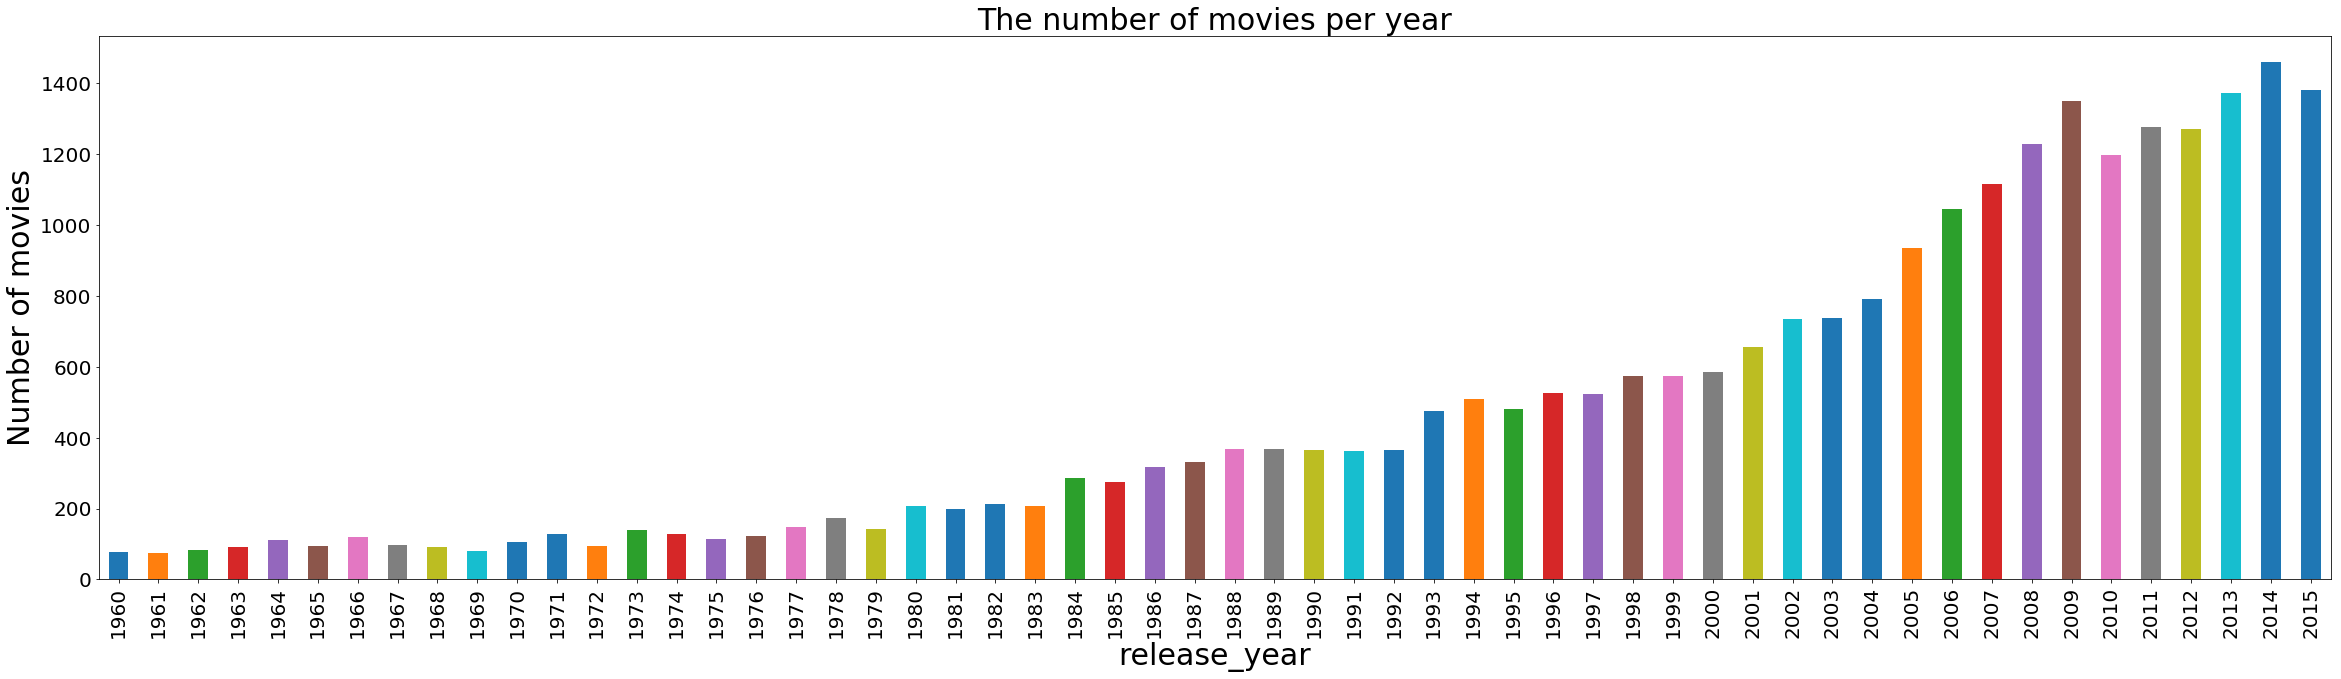

In [8]:
#Plotting the number of movies by year.
plt.figure(figsize=(40,10))
plt.xlabel('release year', fontsize=30)
plt.ylabel('Number of movies', fontsize=30)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('The number of movies per year', fontsize = 30)
df_genre.groupby('release_year').size().plot(kind = 'bar');

We notice that the dataset have a lot of the recent movies, which makes sense since we are producing more movies now then what we used to produce.

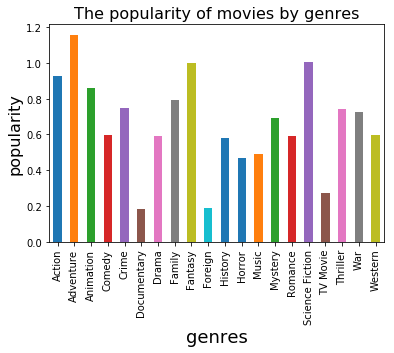

In [10]:
#Plotting the mean popularity of movies by by genres.
plt.figure(figsize=(6,4))
plt.xlabel('genres', fontsize=18)
plt.ylabel('popularity', fontsize=16)
plt.title('The popularity of movies by genres', fontsize = 16)
df_genre.groupby('genres').popularity.mean().plot(kind = 'bar');

We notice that the movies with the highest popularity are Adventure, Action, Fantasy or Science Fiction movies with a popularity mean near to 1, while the less popular movies are Documentaries, Foreign movies and TV Movies with a popularity mean near 0.2 . We can explain this by the fact that the younger generation who watches a lot of movies are interested in those genres.

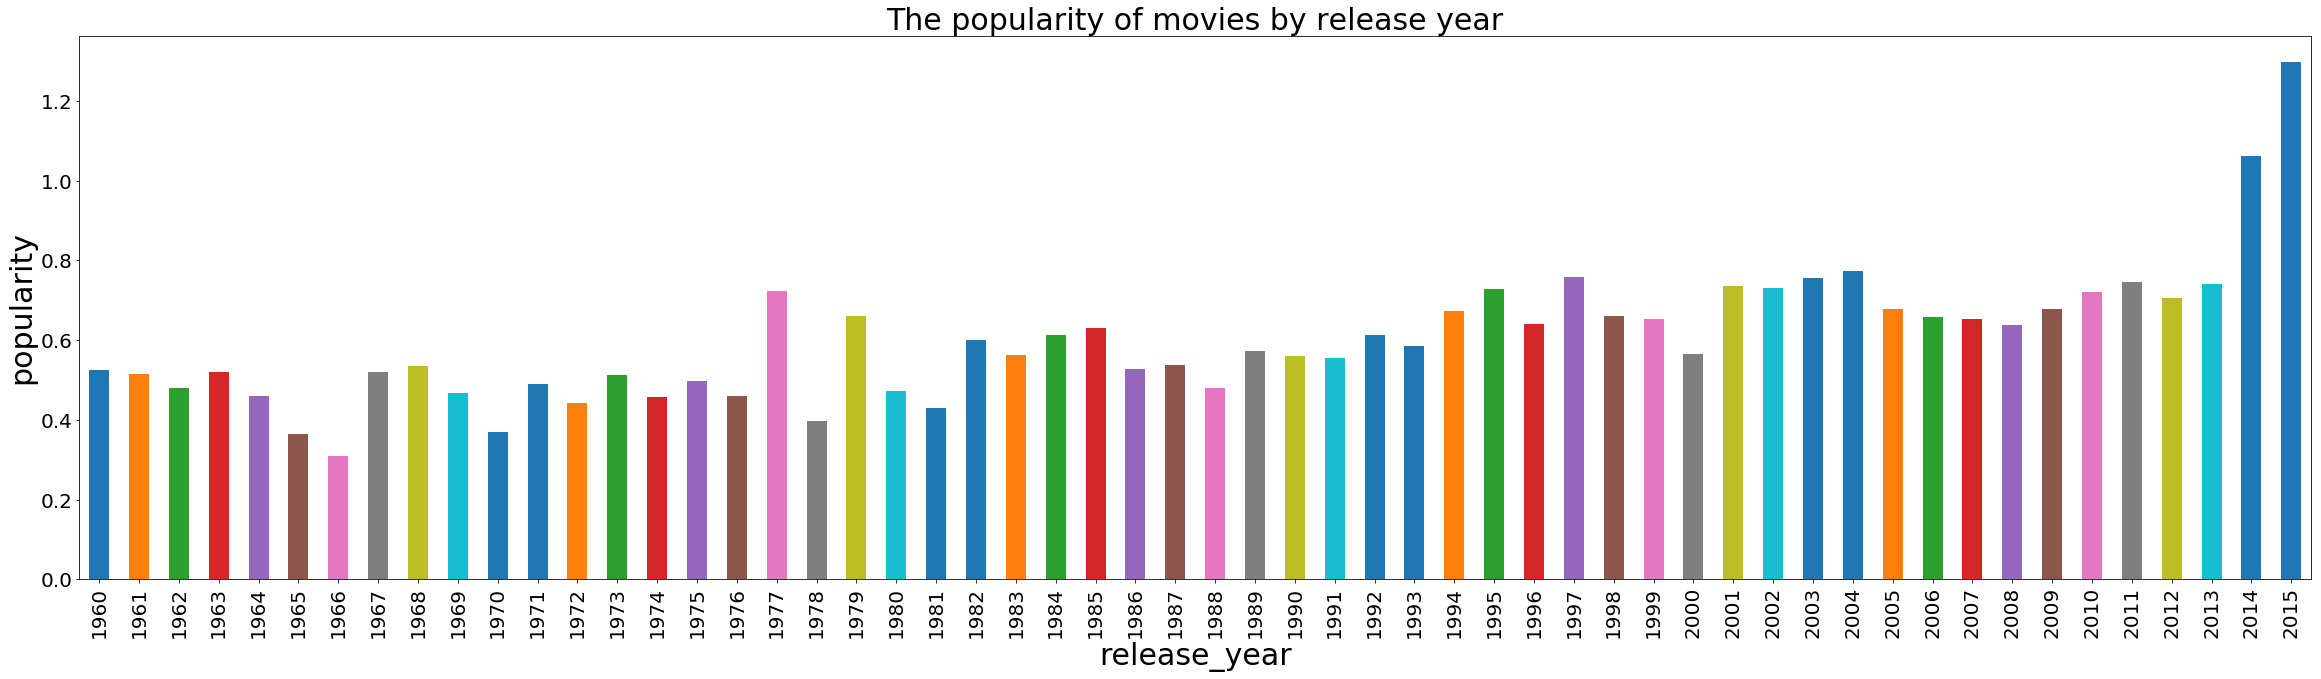

In [11]:
#Plotting the mean popularity of movies by by year.
plt.figure(figsize=(40,10))
plt.xlabel('release year', fontsize=30)
plt.ylabel('popularity', fontsize=30)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('The popularity of movies by release year', fontsize = 30)
df_genre.groupby('release_year').popularity.mean().plot(kind = 'bar');

We notice that movies with high popularity  are recent movies (2014,2015) which can be explained by the fact that recent movies hae a better quality in production.

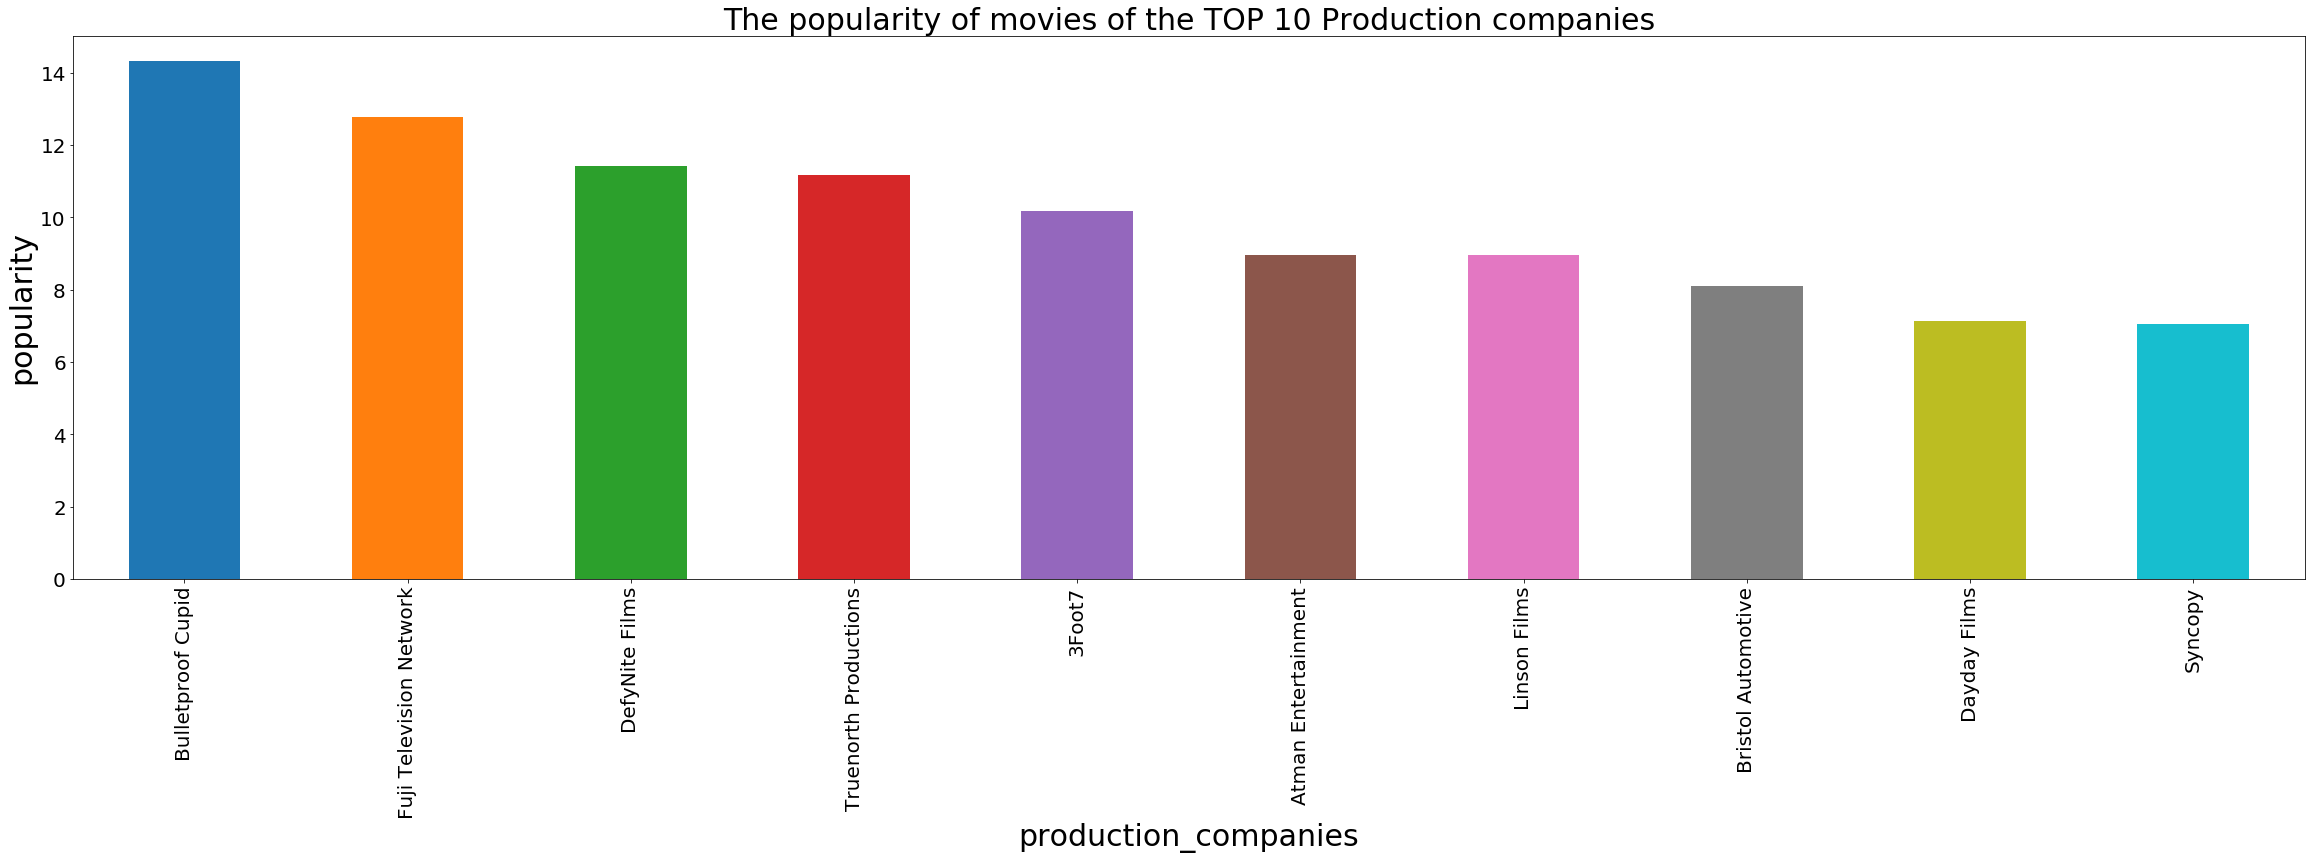

In [12]:
#Plotting the mean popularity of the movies produced by the Top 10 production companies.
plt.figure(figsize=(40,10))
plt.xlabel('Production company', fontsize=30)
plt.ylabel('popularity', fontsize=30)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('The popularity of movies of the TOP 10 Production companies', fontsize = 30)
df_prod.groupby('production_companies').popularity.mean().nlargest(10).plot(kind = 'bar');

We see that the leading production company with a popularity of 14 is Bulletproof Cupid

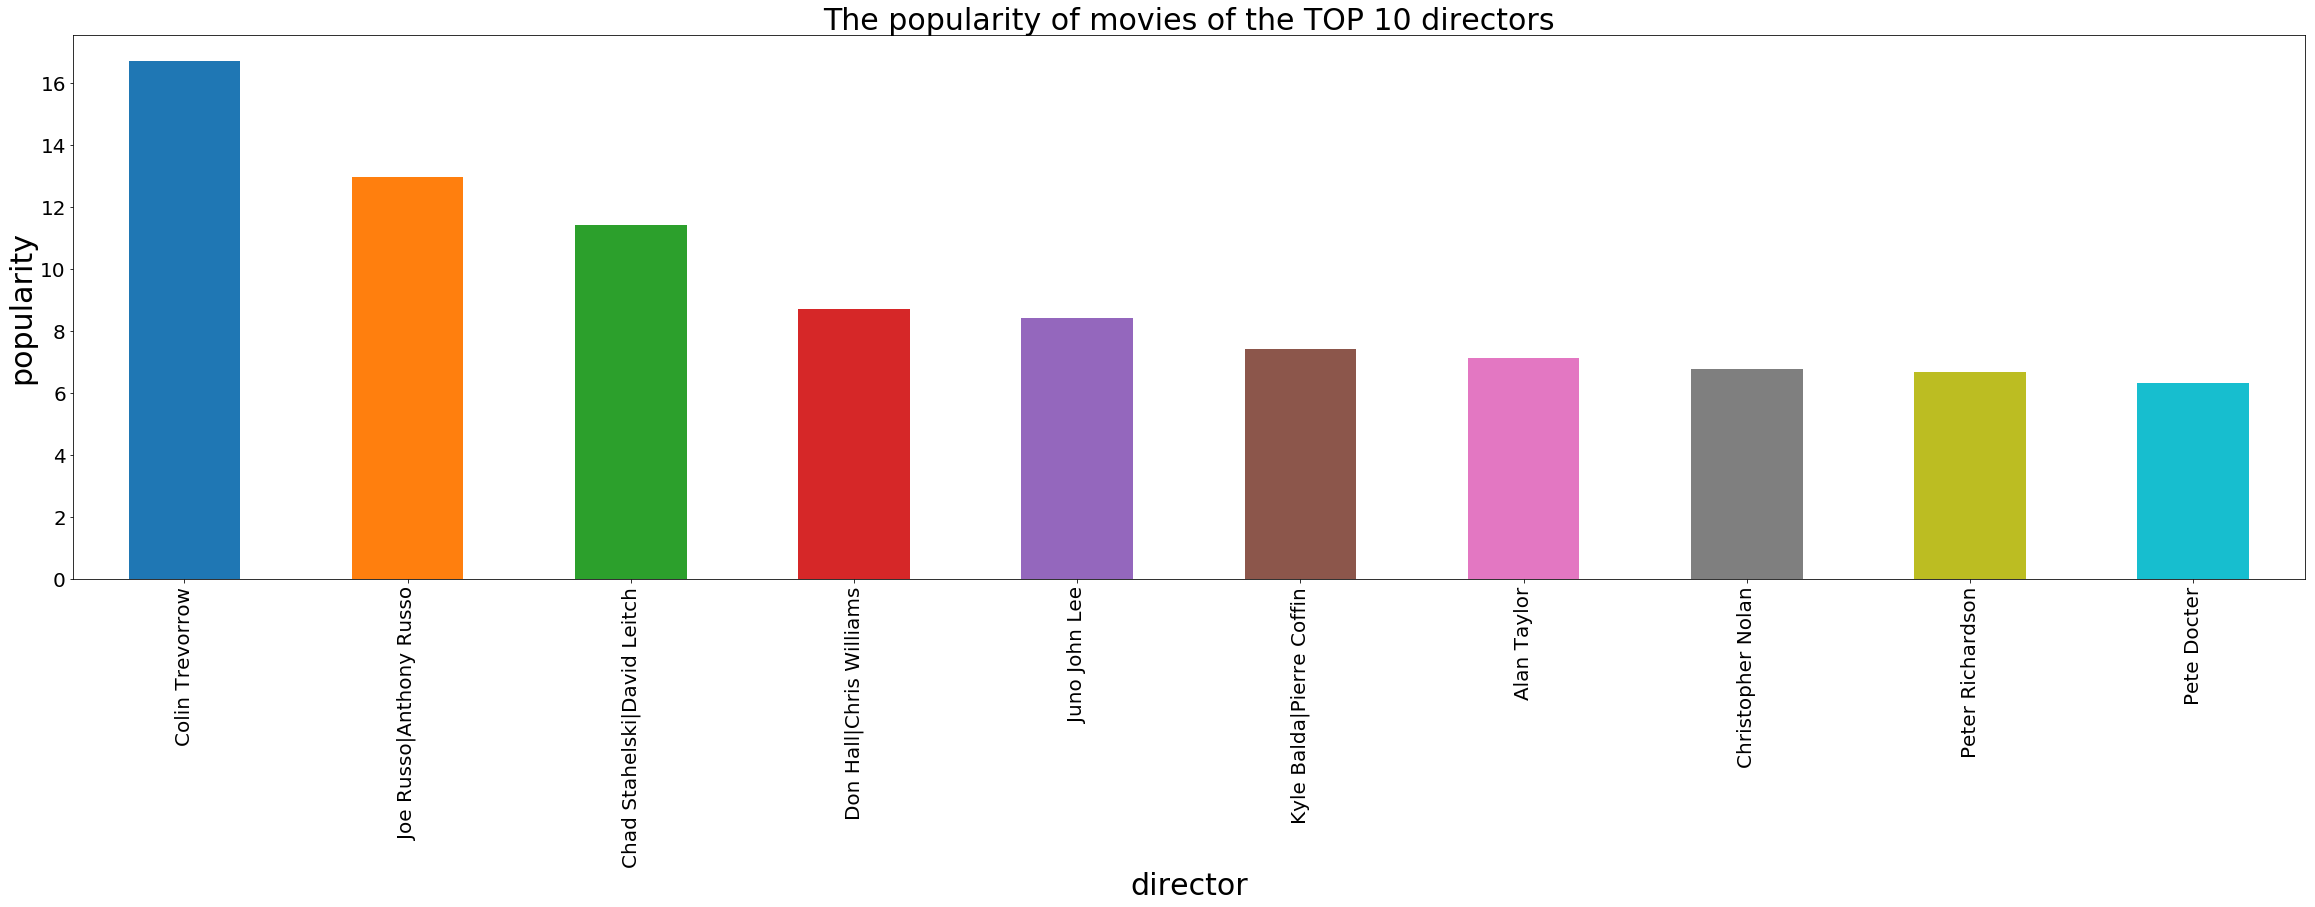

In [13]:
#Plotting the mean popularity of the movies produced by the Top 10 production companies.
plt.figure(figsize=(40,10))
plt.xlabel('Production company', fontsize=30)
plt.ylabel('popularity', fontsize=30)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('The popularity of movies of the TOP 10 directors', fontsize = 30)
df_genre.groupby('director').popularity.mean().nlargest(10).plot(kind = 'bar');

We see that the director with the highest mean popularity is Colin Trevorrow

### Q2  What kinds of properties are associated with movies that have high revenues ?

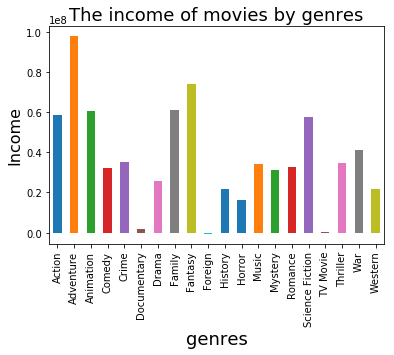

In [14]:
plt.figure(figsize=(6,4))
plt.xlabel('genres', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.title('The income of movies by genres', fontsize = 18)
df_genre.groupby('genres').income_adj.mean().plot(kind = 'bar');

We notice that movies with the genres of Adventure, Fantasy, Science Fiction have the highest income mean that goes from 60M $ to 100M $, while movies with the genres of Documentary, Foregin, TV Movies have a mean income that is so low comparred to the other genres

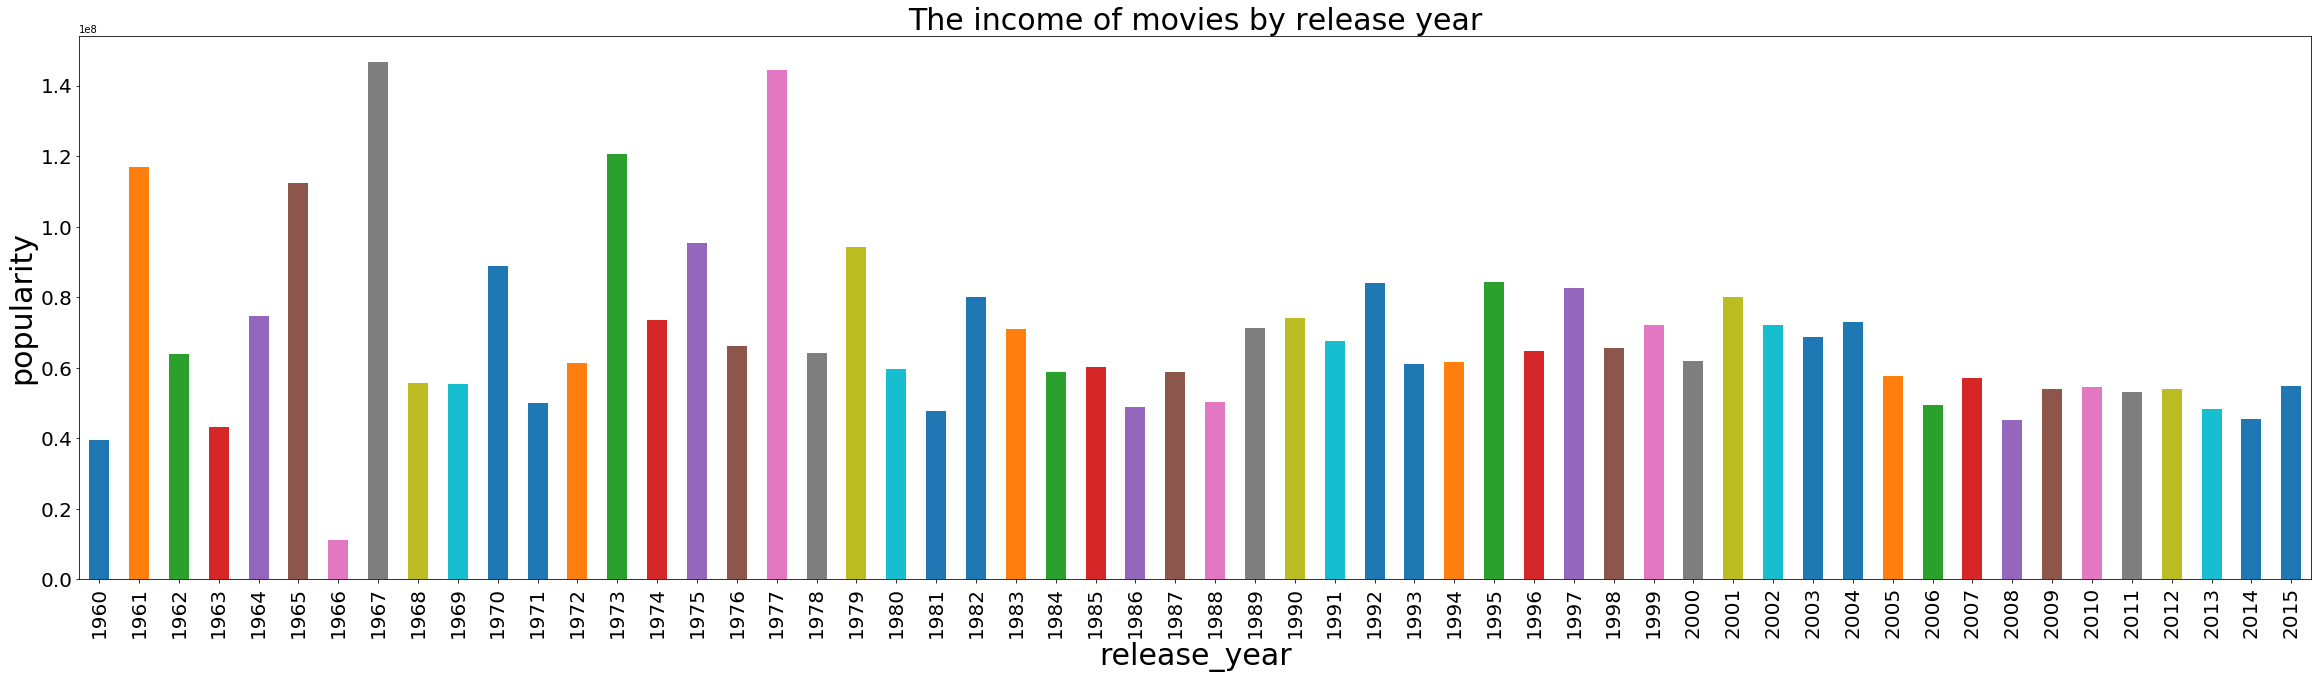

In [15]:
plt.figure(figsize=(40,10))
plt.xlabel('release year', fontsize=30)
plt.ylabel('popularity', fontsize=30)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('The income of movies by release year', fontsize = 30)
df_genre.groupby('release_year').revenue_adj.mean().plot(kind = 'bar');

Surprisenly the movies of 1967 and 1977 hae the highest income, while we notice the in the recent years starting 2005 until 2015, the income is usually around 60M $ 

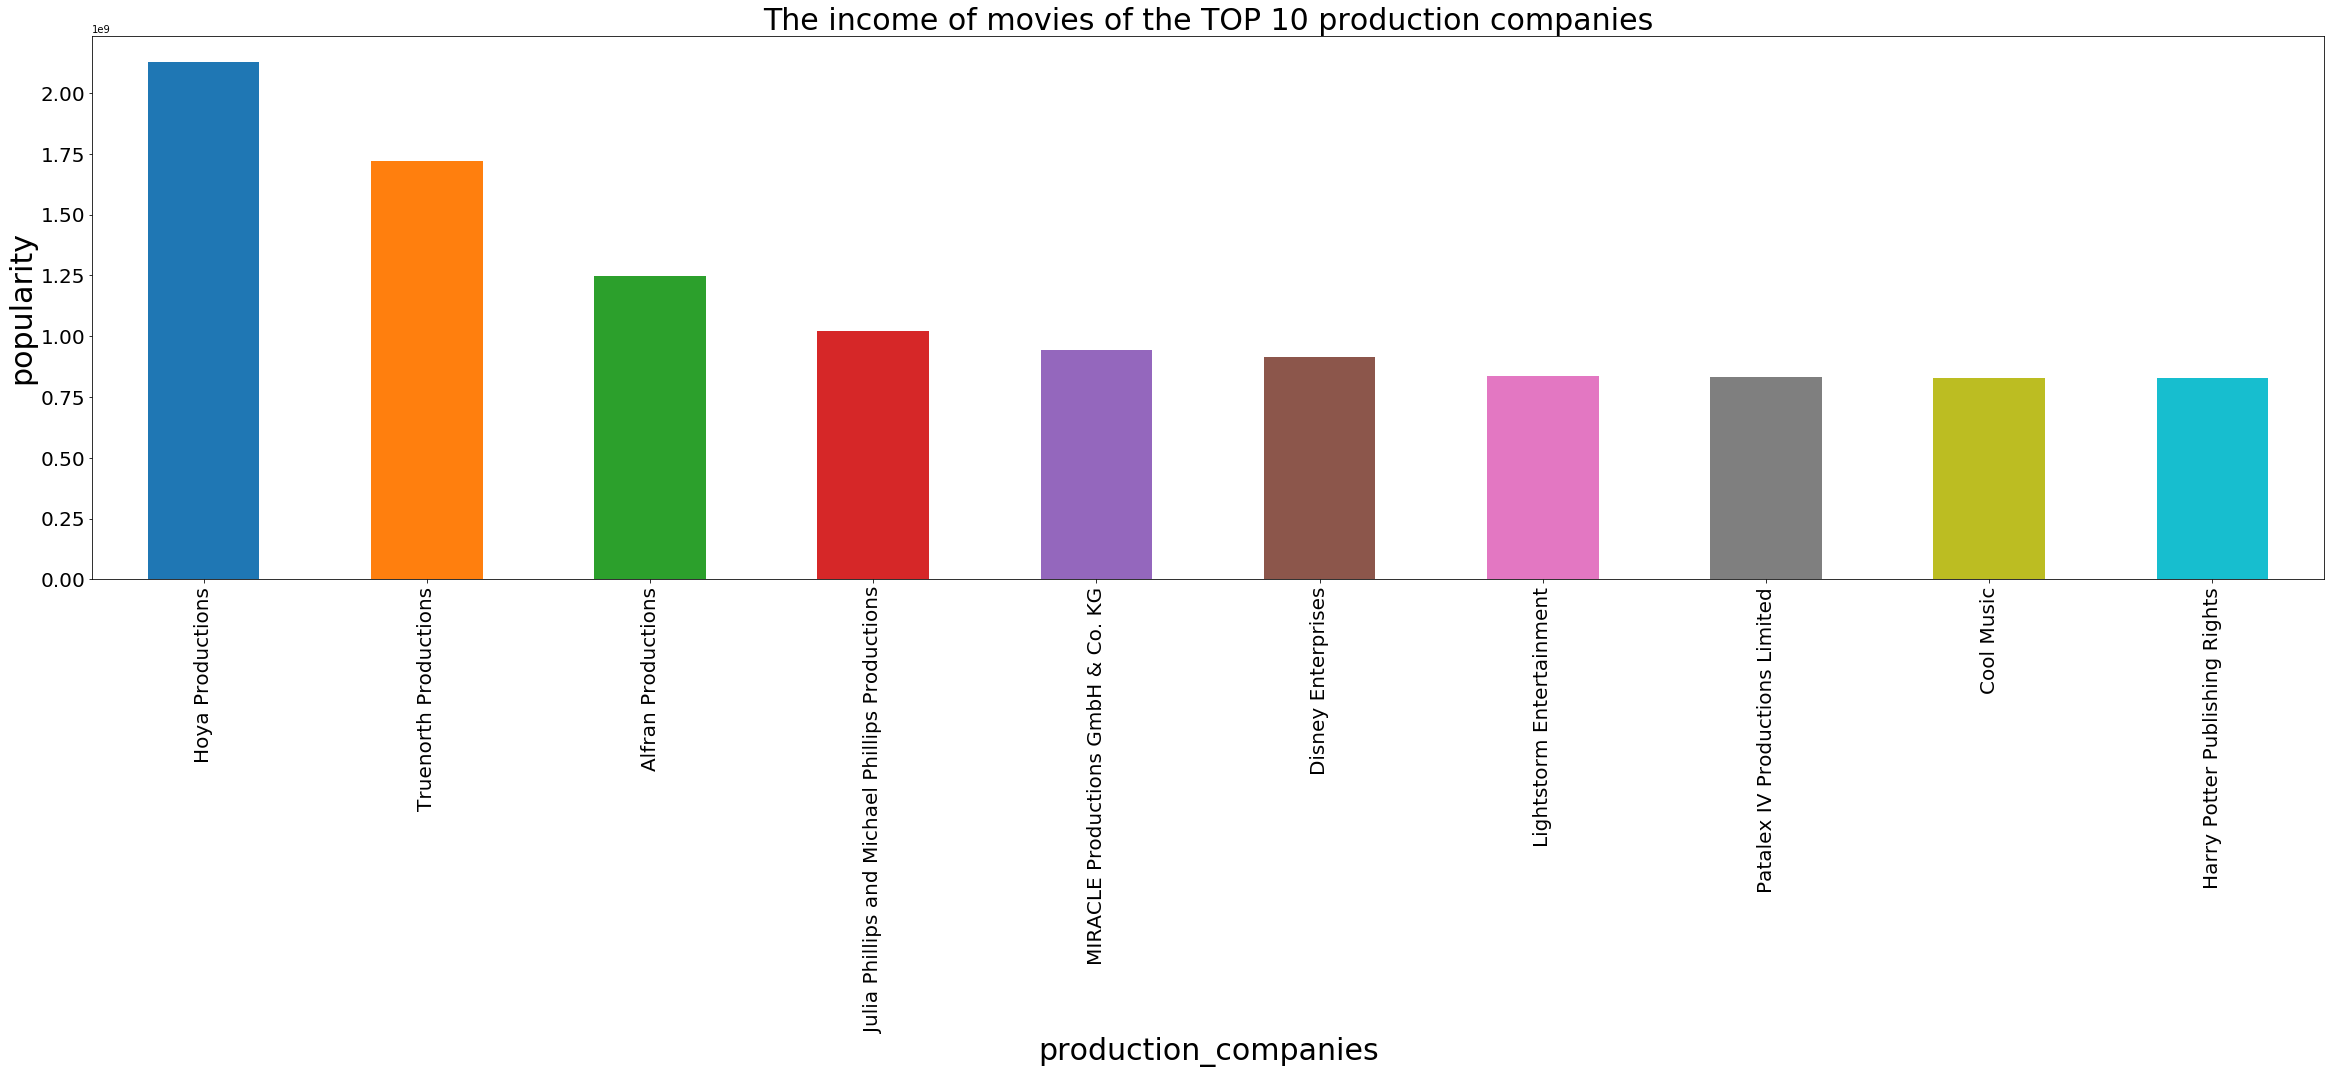

In [16]:
#Plotting the mean popularity of the movies produced by the Top 10 production companies.
plt.figure(figsize=(40,10))
plt.xlabel('Production company', fontsize=30)
plt.ylabel('popularity', fontsize=30)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('The income of movies of the TOP 10 production companies', fontsize = 30)
df_prod.groupby('production_companies').income_adj.mean().nlargest(10).plot(kind = 'bar');

The production company with the highest income average is Hoya Productions.

<a id='conclusions'></a>
## Conclusions

1. The dataset contains a majority of Drama, comedy and thriller movies.
2. The dataset have a lot of the recent movies, which makes sense since we are producing more movies now then what we used to produce.
3. Movies with the highest popularity are Adventure, Action, Fantasy or Science Fiction movies with a popularity mean near to 1, while the less popular movies are Documentaries, Foreign movies and TV Movies with a popularity mean near 0,2.
4. Movies with high popularity are recent movies (2014,2015).
5. The leading production company with a popularity of 14 is Bulletproof Cupid, and the leading director with the highest mean popularity is Colin Trevorrow.
6. Movies with the genres of Adventure, Fantasy, Science Fiction have the highest income mean that goes from 60M dollars to 100M dollars, while movies with the genres of Documentary, Foregin, TV Movies have a mean income that is so low comparred to the other genres.
7. Surprisenly the movies of 1967 and 1977 hae the highest income, while we notice the in the recent years starting 2005 until 2015, the income is usually around 60M dollars.
8. The production company with the highest income average is Hoya Productions.

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0